In [2]:
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from wordcloud import WordCloud,STOPWORDS

In [3]:
news = pd.read_csv('RedditNews.csv')

In [4]:
dowJones = pd.read_csv('DJIA_table.csv')

In [5]:
dowJones['var'] = (dowJones['Close'] / dowJones['Open']) -1


In [6]:
dowJones = dowJones.drop('Adj Close', 1)


In [7]:
dowJones.head()

,Date,Open,High,Low,Close,Volume,var
0,2016-07-01,17924.240234,18002.380859,17916.910156,17949.369141,82160000,0.001402
1,2016-06-30,17712.759766,17930.609375,17711.800781,17929.990234,133030000,0.012264
2,2016-06-29,17456.019531,17704.509766,17456.019531,17694.679688,106380000,0.013672
3,2016-06-28,17190.509766,17409.720703,17190.509766,17409.720703,112190000,0.012752
4,2016-06-27,17355.210938,17355.210938,17063.080078,17140.240234,138740000,-0.012387


In [8]:
news.head()

,Date,News
0,2016-07-01,A 117-year-old woman in Mexico City finally re...
1,2016-07-01,IMF chief backs Athens as permanent Olympic host
2,2016-07-01,"The president of France says if Brexit won, so..."
3,2016-07-01,British Man Who Must Give Police 24 Hours' Not...
4,2016-07-01,100+ Nobel laureates urge Greenpeace to stop o...


In [9]:
def reverse_index(dataset):
    dataset = dataset.reindex(index=dataset.index[::-1])
    dataset = dataset.reset_index()
    dataset = dataset.drop('index',1)
    return dataset

In [10]:
news = reverse_index(news)

In [11]:
news.head()

,Date,News
0,2008-06-08,"b'Marriage, they said, was reduced to the stat..."
1,2008-06-08,"b""UK: Identity cards 'could be used to spy on ..."
2,2008-06-08,b'Angst in Ankara: Turkey Steers into a Danger...
3,2008-06-08,b'Threat of world AIDS pandemic among heterose...
4,2008-06-08,b'Man goes berzerk in Akihabara and stabs ever...


In [12]:
dowJones = reverse_index(dowJones)

In [13]:
dowJones.head()

,Date,Open,High,Low,Close,Volume,var
0,2008-08-08,11432.089844,11759.959961,11388.040039,11734.320312,212830000,0.026437
1,2008-08-11,11729.669922,11867.110352,11675.530273,11782.349609,183190000,0.004491
2,2008-08-12,11781.700195,11782.349609,11601.519531,11642.469727,173590000,-0.011818
3,2008-08-13,11632.809570,11633.780273,11453.339844,11532.959961,182550000,-0.008583
4,2008-08-14,11532.070312,11718.280273,11450.889648,11615.929688,159790000,0.007272


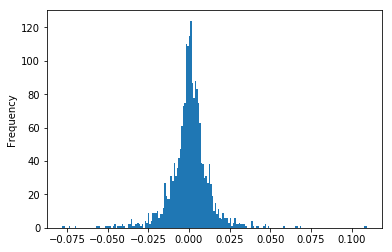

In [14]:
dowJones['var'].plot.hist(bins=200)

In [15]:
def create_variation_label(var):
    if(var == 0.0):
        return('EQUAL')
    elif (var > 0.0) & (var <= 0.012525):
        return('H1')
    elif (var > 0.012525) & (var <= 0.02505):
        return('H2')
    elif (var > 0.02505):
        return('H3')
    elif (var >= -0.012525) & (var < 0):
        return('L1')
    elif (var >= -0.02505) & (var < -0.012525):
        return('L2')
    else:
        return('L3')
    
        
    

In [16]:
dowJones['var_label'] = dowJones['var'].apply(create_variation_label)

In [17]:
dowJones.head()

,Date,Open,High,Low,Close,Volume,var,var_label
0,2008-08-08,11432.089844,11759.959961,11388.040039,11734.320312,212830000,0.026437,H3
1,2008-08-11,11729.669922,11867.110352,11675.530273,11782.349609,183190000,0.004491,H1
2,2008-08-12,11781.700195,11782.349609,11601.519531,11642.469727,173590000,-0.011818,L1
3,2008-08-13,11632.809570,11633.780273,11453.339844,11532.959961,182550000,-0.008583,L1
4,2008-08-14,11532.070312,11718.280273,11450.889648,11615.929688,159790000,0.007272,H1


In [18]:
news.head()

,Date,News
0,2008-06-08,"b'Marriage, they said, was reduced to the stat..."
1,2008-06-08,"b""UK: Identity cards 'could be used to spy on ..."
2,2008-06-08,b'Angst in Ankara: Turkey Steers into a Danger...
3,2008-06-08,b'Threat of world AIDS pandemic among heterose...
4,2008-06-08,b'Man goes berzerk in Akihabara and stabs ever...


In [29]:
completeTable = pd.read_csv('Combined_News_DJIA.csv')


In [23]:
completeTable.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1989 entries, 0 to 1988
Data columns (total 27 columns):
Date     1989 non-null object
Label    1989 non-null int64
Top1     1989 non-null object
Top2     1989 non-null object
Top3     1989 non-null object
Top4     1989 non-null object
Top5     1989 non-null object
Top6     1989 non-null object
Top7     1989 non-null object
Top8     1989 non-null object
Top9     1989 non-null object
Top10    1989 non-null object
Top11    1989 non-null object
Top12    1989 non-null object
Top13    1989 non-null object
Top14    1989 non-null object
Top15    1989 non-null object
Top16    1989 non-null object
Top17    1989 non-null object
Top18    1989 non-null object
Top19    1989 non-null object
Top20    1989 non-null object
Top21    1989 non-null object
Top22    1989 non-null object
Top23    1988 non-null object
Top24    1986 non-null object
Top25    1986 non-null object
dtypes: int64(1), object(26)
memory usage: 419.6+ KB


In [24]:
dowJones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1989 entries, 0 to 1988
Data columns (total 8 columns):
Date         1989 non-null object
Open         1989 non-null float64
High         1989 non-null float64
Low          1989 non-null float64
Close        1989 non-null float64
Volume       1989 non-null int64
var          1989 non-null float64
var_label    1989 non-null object
dtypes: float64(5), int64(1), object(2)
memory usage: 124.4+ KB


In [30]:
completeTable['var'] = dowJones['var']

In [31]:
completeTable['var_label'] = dowJones['var_label']

In [33]:
finalTable = completeTable[['Date','Top1','var','var_label']]

In [34]:
finalTable.head()

,Date,Top1,var,var_label
0,2008-08-08,"b""Georgia 'downs two Russian warplanes' as cou...",0.026437,H3
1,2008-08-11,b'Why wont America and Nato help us? If they w...,0.004491,H1
2,2008-08-12,b'Remember that adorable 9-year-old who sang a...,-0.011818,L1
3,2008-08-13,b' U.S. refuses Israel weapons to attack Iran:...,-0.008583,L1
4,2008-08-14,b'All the experts admit that we should legalis...,0.007272,H1


In [35]:
from sklearn.cross_validation import train_test_split

In [36]:
from sklearn.metrics import classification_report

In [53]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfTransformer
import string
from nltk.corpus import stopwords


In [54]:
def text_process(mess):
    """
    1. remove punc
    2. remove stop words
    3. return list of clean text words
    """

    nopunc = [char for char in mess if char not in string.punctuation]
    
    nopunc = ''.join(nopunc)

    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [55]:
news_train,news_test,var_train,var_test = train_test_split(finalTable['Top1'], finalTable['var_label'], test_size=0.3)

In [56]:
pipeline_NB = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB())
])

In [57]:
pipeline_RF = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf', TfidfTransformer()),
    ('classifier', RandomForestClassifier())
])

In [58]:
pipeline_NB.fit(news_train, var_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function text_process at 0x000000000FDC4620>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocesso...f=False, use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [59]:
predictions_NB = pipeline_NB.predict(news_test)

In [60]:
pipeline_RF.fit(news_train, var_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function text_process at 0x000000000FDC4620>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocesso...n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])

In [61]:
predictions_RF = pipeline_RF.predict(news_test)

In [62]:
print(classification_report(var_test,predictions_NB))

             precision    recall  f1-score   support

         H1       0.46      0.63      0.53       290
         H2       0.00      0.00      0.00        41
         H3       0.00      0.00      0.00        12
         L1       0.29      0.31      0.30       196
         L2       0.00      0.00      0.00        43
         L3       0.00      0.00      0.00        15

avg / total       0.32      0.41      0.36       597



C:\Users\Matheus\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [63]:
print(classification_report(var_test,predictions_RF))

             precision    recall  f1-score   support

         H1       0.48      0.74      0.58       290
         H2       0.00      0.00      0.00        41
         H3       0.00      0.00      0.00        12
         L1       0.30      0.20      0.24       196
         L2       0.00      0.00      0.00        43
         L3       0.00      0.00      0.00        15

avg / total       0.33      0.43      0.36       597



C:\Users\Matheus\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Tentativa com menos classes





In [68]:
def create_binary_label(var):
    if(var > 0.0):
        return('HIGH')
    else:
        return('LOW')

In [69]:
dowJones = pd.read_csv('DJIA_table.csv')
dowJones['var'] = (dowJones['Close'] / dowJones['Open']) -1
dowJones = dowJones.drop('Adj Close', 1)
dowJones = reverse_index(dowJones)


In [70]:
dowJones['var_label'] = dowJones['var'].apply(create_binary_label)

In [79]:
dowJones.head()

,Date,Open,High,Low,Close,Volume,var,var_label
0,2008-08-08,11432.089844,11759.959961,11388.040039,11734.320312,212830000,0.026437,HIGH
1,2008-08-11,11729.669922,11867.110352,11675.530273,11782.349609,183190000,0.004491,HIGH
2,2008-08-12,11781.700195,11782.349609,11601.519531,11642.469727,173590000,-0.011818,LOW
3,2008-08-13,11632.809570,11633.780273,11453.339844,11532.959961,182550000,-0.008583,LOW
4,2008-08-14,11532.070312,11718.280273,11450.889648,11615.929688,159790000,0.007272,HIGH


In [80]:
completeTable['var'] = dowJones['var']
completeTable['var_label'] = dowJones['var_label']
finalTable = completeTable[['Date','Top1','var','var_label']]

In [81]:
finalTable.head()

,Date,Top1,var,var_label
0,2008-08-08,"b""Georgia 'downs two Russian warplanes' as cou...",0.026437,HIGH
1,2008-08-11,b'Why wont America and Nato help us? If they w...,0.004491,HIGH
2,2008-08-12,b'Remember that adorable 9-year-old who sang a...,-0.011818,LOW
3,2008-08-13,b' U.S. refuses Israel weapons to attack Iran:...,-0.008583,LOW
4,2008-08-14,b'All the experts admit that we should legalis...,0.007272,HIGH


In [82]:
news_train,news_test,var_train,var_test = train_test_split(finalTable['Top1'], finalTable['var_label'], test_size=0.3)

In [83]:
pipeline_NB.fit(news_train, var_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function text_process at 0x000000000FDC4620>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocesso...f=False, use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [84]:
predictions_NB = pipeline_NB.predict(news_test)

In [85]:
pipeline_RF.fit(news_train, var_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function text_process at 0x000000000FDC4620>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocesso...n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])

In [86]:
predictions_RF = pipeline_RF.predict(news_test)

In [87]:
print(classification_report(var_test,predictions_NB))

             precision    recall  f1-score   support

       HIGH       0.56      0.65      0.60       338
        LOW       0.42      0.33      0.37       259

avg / total       0.50      0.51      0.50       597



In [88]:
print(classification_report(var_test,predictions_RF))

             precision    recall  f1-score   support

       HIGH       0.56      0.79      0.66       338
        LOW       0.42      0.20      0.27       259

avg / total       0.50      0.53      0.49       597

